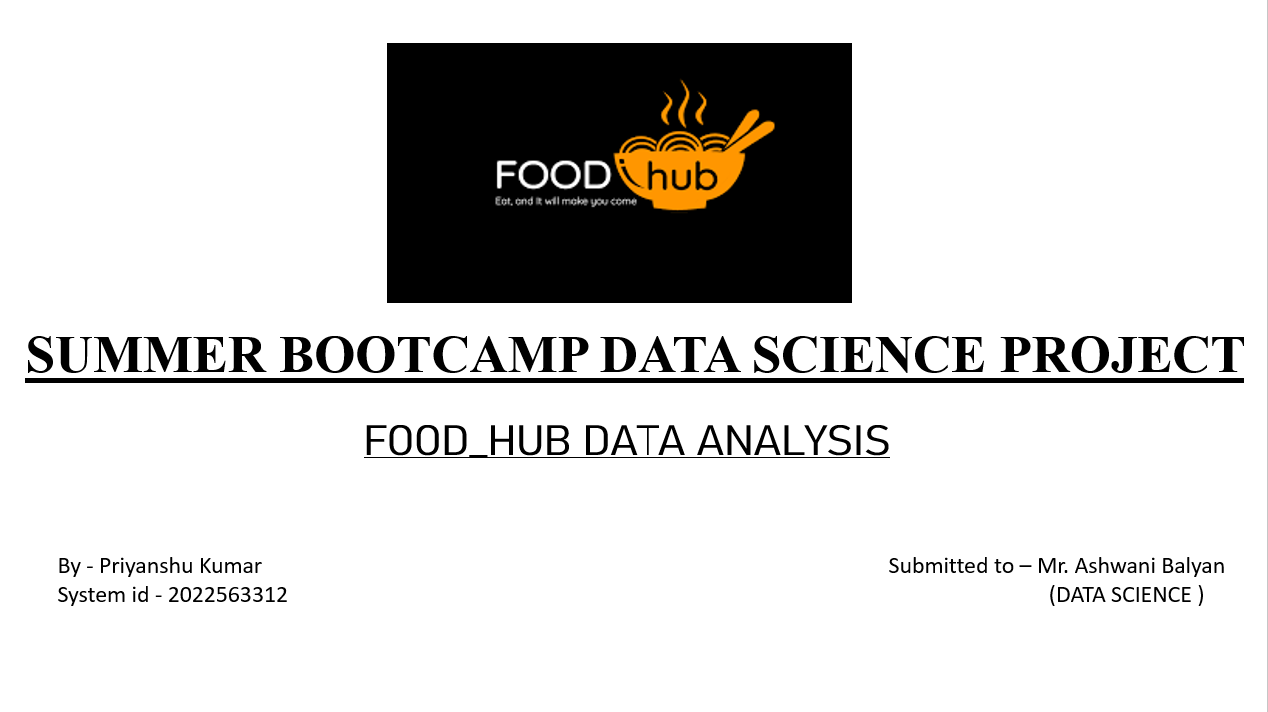

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('2-foodhub_order_New.csv')

In [37]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


In [38]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31.0,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31.0,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23.0,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28.0,24


In [39]:
df.shape

(1898, 9)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1895 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1896 non-null   float64
 8   delivery_time          1898 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


In [41]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time
count,1.898000e+03,1898.000000,1898.000000,1896.000000
mean,1.477496e+06,171168.478398,80.722007,27.371835
std,5.480497e+02,113698.139743,2798.141333,4.634211
min,1.476547e+06,1311.000000,0.000000,20.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000
50%,1.477496e+06,128600.000000,14.160000,27.000000
75%,1.477970e+06,270525.000000,22.310000,31.000000
max,1.478444e+06,405334.000000,121920.000000,35.000000


In [42]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64

In [43]:
df.duplicated().sum()

0

In [44]:
# here i will check for deliver_time and rating column because as seen earlier there datatype should be numerical in real life but it is object
print('for deliver_time column:',df['delivery_time'].unique())
print('for rating column:',df['rating'].unique())

for deliver_time column: ['20' '?' '28' '15' '24' '21' '30' '26' '22' '17' '23' '25' '16' '29' '27'
 '18' '31' '32' '19' '33']
for rating column: ['Not given' '5' '3' '4']


<function matplotlib.pyplot.show(close=None, block=None)>

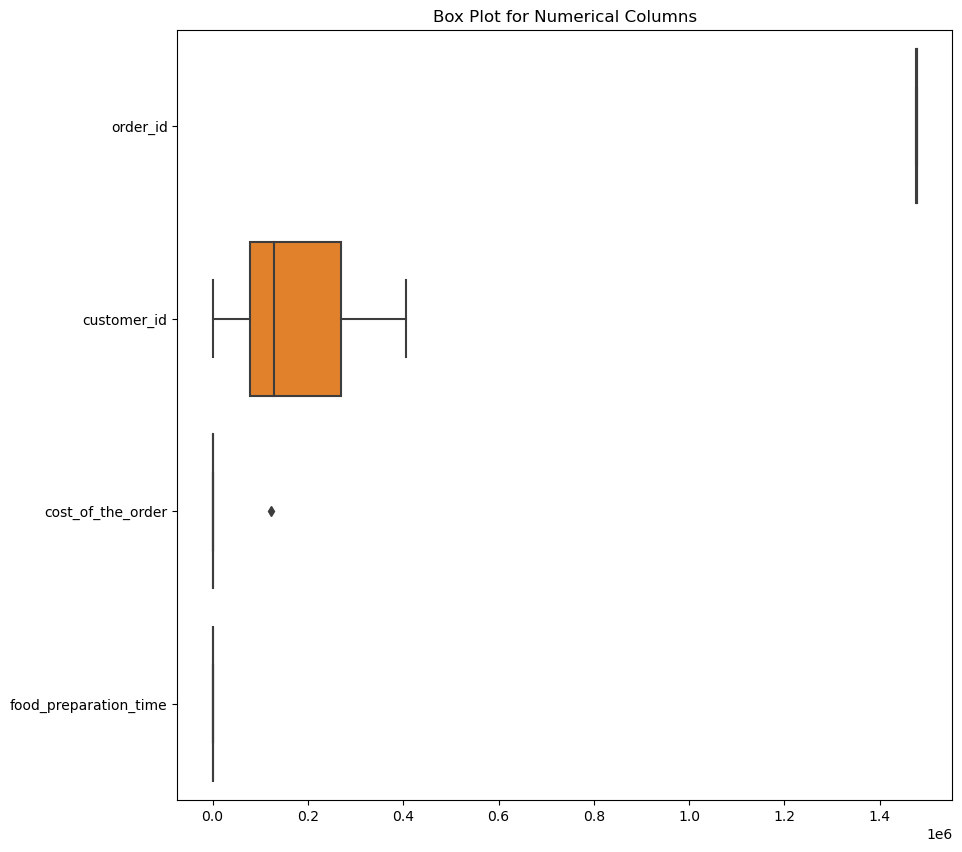

In [45]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot for Numerical Columns')
plt.show

In [46]:
# checking for duplicate rows
df.duplicated().sum()

0

In [47]:
# we know we will check for deliver_time column and rating column
# checking for unique values for 'deliver_time'
df['delivery_time'].unique()

array(['20', '?', '28', '15', '24', '21', '30', '26', '22', '17', '23',
       '25', '16', '29', '27', '18', '31', '32', '19', '33'], dtype=object)

In [48]:
df['delivery_time'].value_counts()

delivery_time
24    161
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     76
32     59
33     49
31     41
?       2
Name: count, dtype: int64

In [49]:
# getting rows with 'delivery time' as '?'
df[df['delivery_time']=='?']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
180,1476808,84700,Pepe Giallo,Italian,14.60,Weekday,3,32.0,?


In [50]:
# replacing the '?' with null value
df['delivery_time']=df['delivery_time'].replace('?',np.nan)

In [51]:
df['delivery_time'].unique()

array(['20', nan, '28', '15', '24', '21', '30', '26', '22', '17', '23',
       '25', '16', '29', '27', '18', '31', '32', '19', '33'], dtype=object)

In [52]:
df[df['delivery_time']=='?']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


In [53]:
# Now we can change datatype of this column from object to numeric
df['delivery_time'] = df['delivery_time'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1895 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1896 non-null   float64
 8   delivery_time          1896 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 133.6+ KB


In [54]:
# now well do for rating column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [55]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [56]:
df[df['rating']=='Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20.0
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,NaN
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28.0,21.0
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34.0,28.0
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23.0,30.0
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26.0,30.0
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22.0,28.0
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29.0,21.0
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24.0


In [57]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [58]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [59]:
df[df['rating']=='Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20.0
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,NaN
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28.0,21.0
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34.0,28.0
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23.0,30.0
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26.0,30.0
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22.0,28.0
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29.0,21.0
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24.0


In [60]:
df=df[df["rating"]!="Not given"]

In [61]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28.0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15.0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24.0
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20.0,24.0
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33.0,30.0
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33.0,30.0
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20.0,22.0
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31.0,17.0
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31.0,19.0


In [62]:
df['rating'].unique()

array(['5', '3', '4'], dtype=object)

In [63]:
df[df['rating']=='Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


In [64]:
df['rating'] = df['rating'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1161 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1162 non-null   float64
 8   delivery_time          1161 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 90.8+ KB


In [65]:
# fetch all the rows having atleast one null value
df[df.isnull().sum(axis=1)>0]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
11,1478437,221206,Empanada Mama (closed),NaN,8.1,Weekend,5.0,23.0,22.0
180,1476808,84700,Pepe Giallo,Italian,14.6,Weekday,3.0,32.0,NaN


In [66]:
# check for missing value in columns
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             1
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            1
dtype: int64

In [67]:
# check fro percentage wise missing values in columns
df.isnull().sum()/len(df)*100

order_id                 0.000000
customer_id              0.000000
restaurant_name          0.000000
cuisine_type             0.086059
cost_of_the_order        0.000000
day_of_the_week          0.000000
rating                   0.000000
food_preparation_time    0.000000
delivery_time            0.086059
dtype: float64

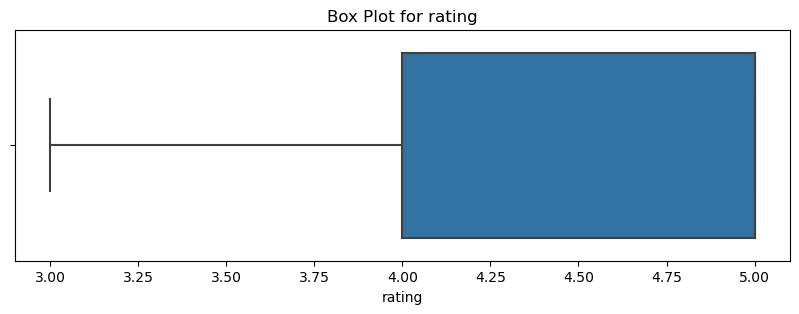

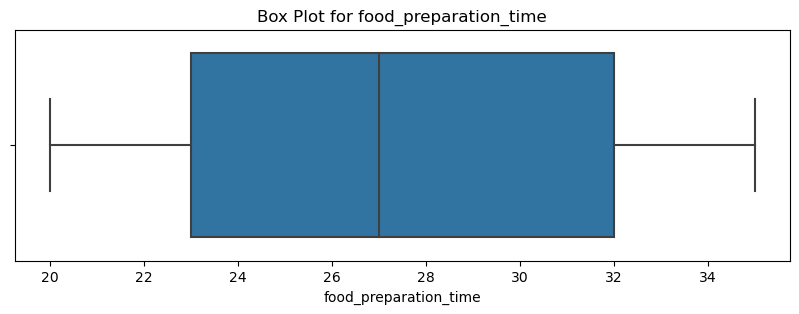

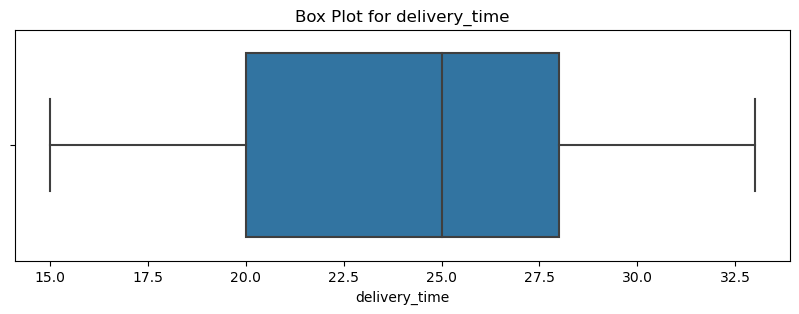

In [68]:
# firstly checking for outliers in numeric columns where there are null values
for i in ['rating','food_preparation_time','delivery_time']:
    plt.figure(figsize=(10,3))
    sns.boxplot(data = df, x=i)
    plt.title(f'Box Plot for {i}')
    plt.show()

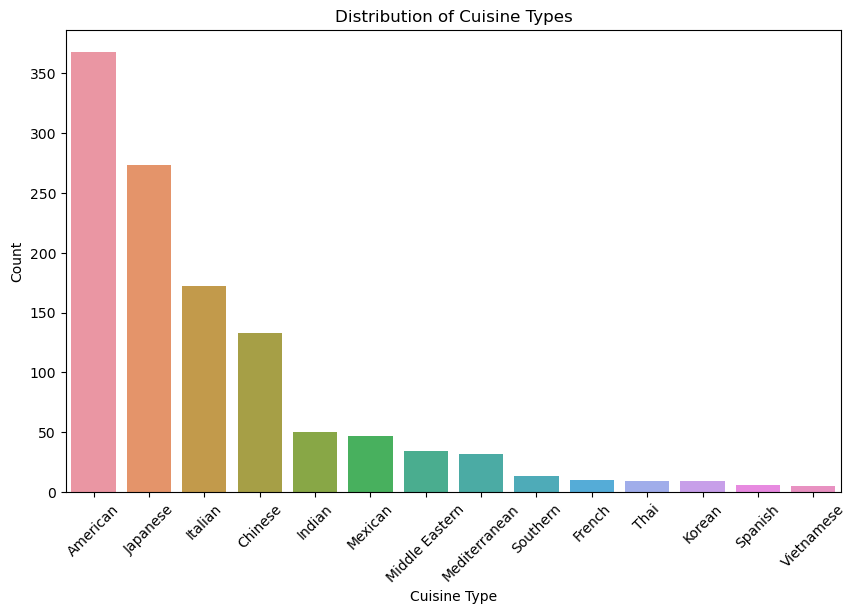

In [69]:
# now let us check for outliers in  categorical column which has null entries
# understanding the distribution 

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cuisine_type',order=df['cuisine_type'].value_counts().index)
plt.title('Distribution of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [70]:
# Define the function to calculate lower and upper bounds
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

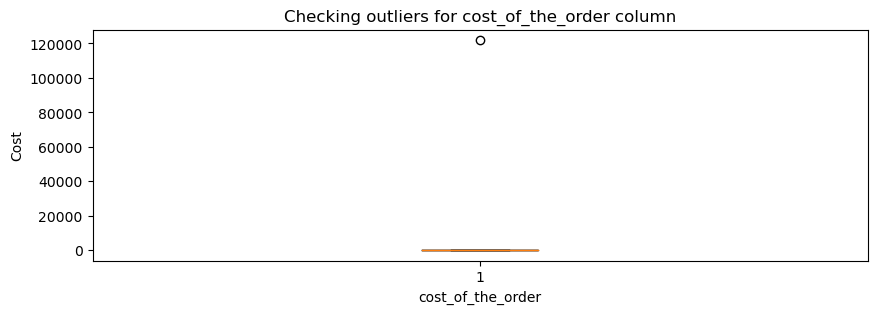

In [71]:
# plotting graph to check for outliers in cost_of_the_order column
plt.figure(figsize=(10,3))
plt.boxplot(data=df,x='cost_of_the_order')
plt.ylabel('Cost')
plt.xlabel('cost_of_the_order')
plt.title('Checking outliers for cost_of_the_order column')
plt.show()


In [72]:
# Calculate the lower and upper bounds for the 'cost_of_the_order' column
ll,ul = remove_outliers(df['cost_of_the_order'])

# Now removing outliers for column cost_of_the_order
df['cost_of_the_order']=np.where(df['cost_of_the_order']>ul,ul,df['cost_of_the_order'])
df['cost_of_the_order']=np.where(df['cost_of_the_order']<ll,ll,df['cost_of_the_order'])

count    1162.000000
mean       16.783614
std         7.598604
min         4.470000
25%        12.130000
50%        14.600000
75%        22.750000
max        38.680000
Name: cost_of_the_order, dtype: float64


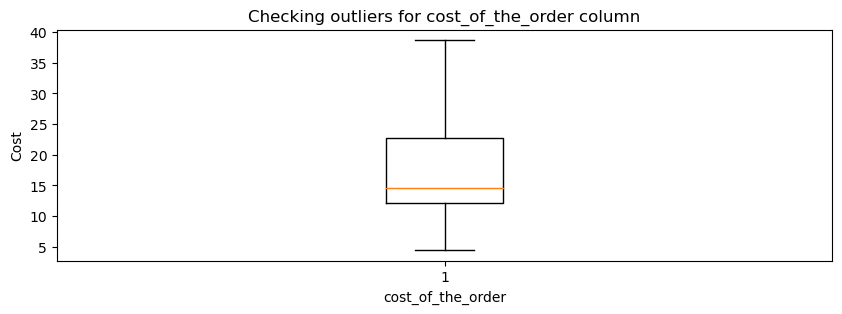

In [73]:
# Verifying changes
print(df['cost_of_the_order'].describe())
plt.figure(figsize=(10,3))
plt.boxplot(data=df,x='cost_of_the_order')
plt.ylabel('Cost')
plt.xlabel('cost_of_the_order')
plt.title('Checking outliers for cost_of_the_order column')
plt.show()


In [74]:
# Now for the cuisine_type column it is a categorical column so we use mode
mode_cus = df['cuisine_type'].mode().values[0]
df['cuisine_type']=df['cuisine_type'].replace(np.nan,mode_cus)

In [76]:
# Now for food_preparation_time, diliver_time and rating column they are all numeric and there are no outliers so we use mean
mean_food = df['food_preparation_time'].mean()
mean_delivery = df['delivery_time'].mean()
mean_rating = df['rating'].mean()

df['food_preparation_time'].replace(np.nan,mean_food,inplace=True)
df['delivery_time'].replace(np.nan,mean_delivery,inplace=True)
df['rating'].replace(np.nan,mean_rating,inplace=True)

In [77]:
# Now verifying the changes
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

# ORDER ANALYSIS 

## 1.What is the total number of orders in the dataset ?


In [78]:
num_orders = df.shape[0]
print('The total number of orders in the data set are: ',num_orders)

The total number of orders in the data set are:  1162


## 2.What is the average cost of an order?

In [79]:
avg_cost = df['cost_of_the_order'].mean()
print(f"The average cost of order is: {avg_cost:.4f}")


The average cost of order is: 16.7836


## 3.How many unique customers have placed orders?

In [80]:
uni_cust = df['customer_id'].nunique()
print(f"Number of unique customers are: {uni_cust}")

Number of unique customers are: 859


## 4.Which restaurant has received the highest number of orders?

In [81]:
res_order_counts = df['restaurant_name'].value_counts()
top_restaurant = res_order_counts.index[0]
print(f"The restaurant with the highest number of orders is: {top_restaurant}")

The restaurant with the highest number of orders is: Shake Shack


# CUSTOMER BEHAVIOUR

## 1. What is the average rating given by customers?



In [82]:
avg_rating = df['rating'].mean()
print(f"The average rating by custoemrs is: {avg_rating}")

The average rating by custoemrs is: 4.344234079173838


## 2.How does the rating vary between weekdays and weekends?

In [83]:
# Calculate the average rating for weekdays and weekends
average_ratings = df.groupby('day_of_the_week')['rating'].mean()

# Print the results
print('Average rating on Weekdays: {:.2f}'.format(average_ratings['Weekday']))
print('Average rating on Weekends: {:.2f}'.format(average_ratings['Weekend']))


Average rating on Weekdays: 4.31
Average rating on Weekends: 4.36


## 3.Which cuisine type is ordered the most?

In [84]:
most_order_cuisine = df['cuisine_type'].value_counts()
print("most ordered cuisine is: ",most_order_cuisine.index[0])

most ordered cuisine is:  American


## 4.What is the distribution of orders across different days of the week?

In [85]:
order_distribution = df['day_of_the_week'].value_counts()
print(order_distribution)

day_of_the_week
Weekend    822
Weekday    340
Name: count, dtype: int64


# RESTAURANT PERFORMANCE 

## 	1.It is the average food preparation time for each restaurant?

In [86]:
avg_food_prep_rest= df.groupby('restaurant_name')['food_preparation_time'].mean()
print("Restaurant: Average food preparation time")
for restaurant, avg_time in avg_food_prep_rest.items():
    print(f"{restaurant}: {avg_time:.2f}")

Restaurant: Average food preparation time
'wichcraft: 28.00
12 Chairs: 27.50
5 Napkin Burger: 26.50
67 Burger: 20.00
Amma: 23.50
Amy Ruth's: 27.00
Anjappar Chettinad: 21.00
Asuka Sushi: 24.00
Balade: 25.00
Balthazar Boulangerie: 29.20
Barbounia: 30.25
Bareburger: 27.41
Benihana: 23.50
Bhatti Indian Grill: 21.00
Big Daddy's: 27.00
Blue Ribbon Brooklyn: 25.67
Blue Ribbon Fried Chicken: 26.98
Blue Ribbon Sushi: 27.67
Blue Ribbon Sushi Bar & Grill: 26.36
Blue Ribbon Sushi Izakaya: 28.89
Boqueria: 27.00
Bubby's : 30.00
Bukhara Grill: 26.00
Burger Joint: 29.50
Byblos Restaurant: 33.00
Cafe Habana: 26.09
Cafe Mogador: 25.31
Cafe de La Esquina: 27.00
Cafeteria: 29.00
CafÌ© China: 28.00
Carmine's: 27.00
Chipotle Mexican Grill $1.99 Delivery: 26.33
Cho Dang Gol: 23.60
Chola Eclectic Indian Cuisine: 30.00
Chote Nawab: 24.00
Cipriani Le Specialita: 35.00
Delicatessen: 28.33
DespaÌ±a: 21.00
Dickson's Farmstand Meats: 26.33
Dig Inn Seasonal Market: 27.00
Dirty Bird To Go (archived): 22.00
Dirty Bird

## 2.Which restaurant has the shortest average food preparation time?

In [87]:
avg_food_prep_rest = df.groupby('restaurant_name')['food_preparation_time'].mean()
# shortest = avg_food_prep_rest.sort_values(ascending=True).head(1)

shortest_time = avg_food_prep_rest.min()
rest = avg_food_prep_rest.idxmin()

print("Shortest food preparation time restaurant is: ",rest)
print("With avg prepartion time: ",shortest_time)

Shortest food preparation time restaurant is:  67 Burger
With avg prepartion time:  20.0


## 3.How does the average delivery time compare across different restaurants?

Average delivery time for each restaurant: 
      restaurant_name  delivery_time
0          'wichcraft           28.0
1           12 Chairs           29.0
2     5 Napkin Burger           21.0
3           67 Burger           28.0
4                Amma           25.5
..                ...            ...
151    Zero Otto Nove           25.0
152              brgr           26.0
153        da Umberto           30.0
154  ilili Restaurant           25.0
155         indikitch           28.0

[156 rows x 2 columns]


C:\Users\ACER\anaconda3\New folder\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


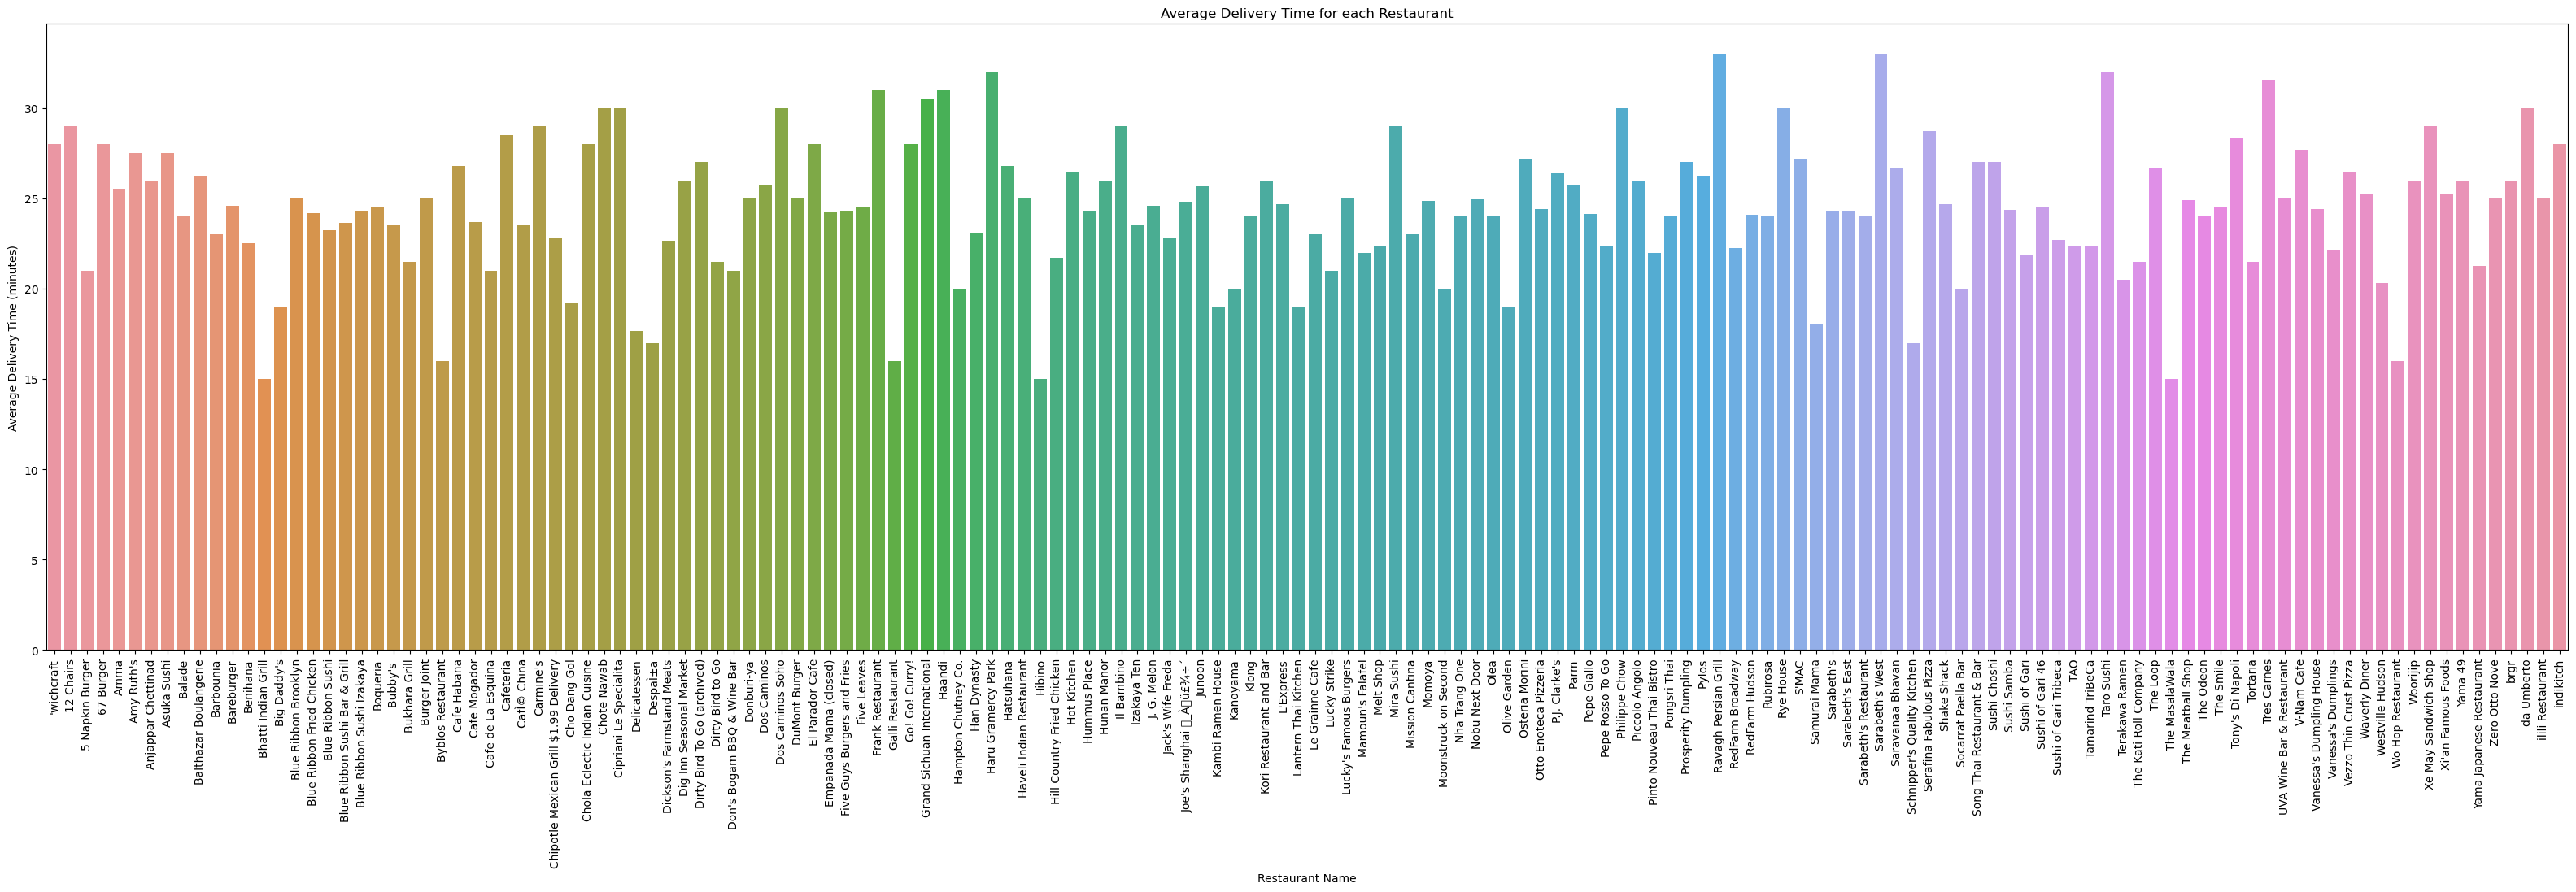

In [88]:
# Calculating average delivery time across restaurant
avg_delivery_time = df.groupby('restaurant_name')['delivery_time'].mean().reset_index()
print("Average delivery time for each restaurant: ")
print(avg_delivery_time)

# Visualizing using bar plot
plt.figure(figsize=(40, 10))
sns.barplot(data=avg_delivery_time, x='restaurant_name', y='delivery_time')
plt.title('Average Delivery Time for each Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=90)
plt.show()


## 4.Is there a correlation between the cost of the order and the rating given?

Correlation between cost_of_the_order and rating: 0.03


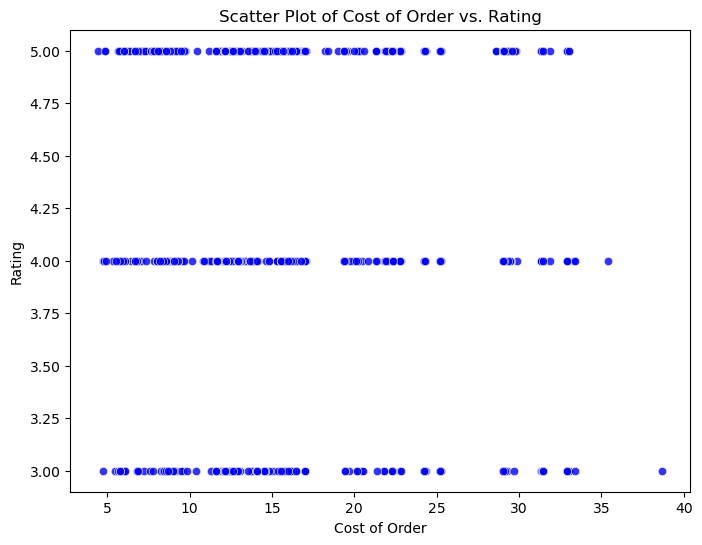

In [89]:
# calculate correlation coefficient
correlation =df['cost_of_the_order'].corr(df['rating'])
print(f"Correlation between cost_of_the_order and rating: {correlation:.2f}")

#Visualize the relationship with a scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='cost_of_the_order',y='rating',data = df,color='blue',alpha=0.8)
plt.title('Scatter Plot of Cost of Order vs. Rating')
plt.xlabel('Cost of Order')
plt.ylabel('Rating')
plt.show()

# DEMAND PATTERNS 

## 1.How does the demand for different cuisine types vary on weekdays versus weekends?

<Figure size 1000x600 with 0 Axes>

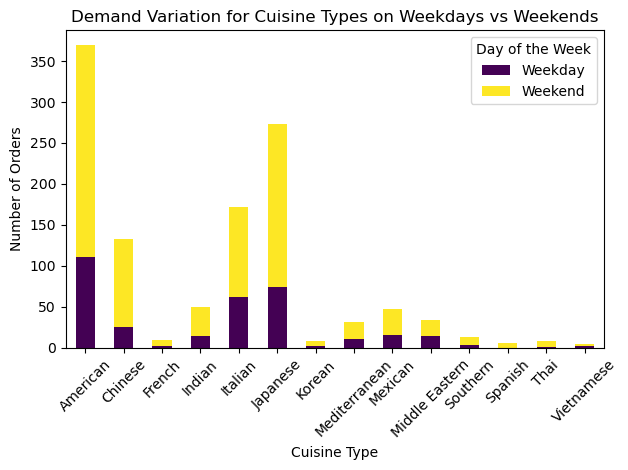

In [90]:
demand_variation = df.groupby(['cuisine_type','day_of_the_week']).size().reset_index(name='order_count')
demand_pivot = demand_variation.pivot(index='cuisine_type', columns='day_of_the_week', values='order_count')


# Visualize using bar plot
plt.figure(figsize=(10, 6))
demand_pivot.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Demand Variation for Cuisine Types on Weekdays vs Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week', loc='upper right')
plt.tight_layout()
plt.show()

## 2.Which day of the week has the highest average order cost?

In [91]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23.0,28.0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25.0,15.0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25.0,24.0
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20.0,24.0
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33.0,30.0


In [92]:
avg_day_cost_of_order = df.groupby('day_of_the_week')['cost_of_the_order'].mean()
highest = avg_day_cost_of_order.sort_values(ascending=False).head(1)
print("Day with the highest average order cost:", highest.index[0])


Day with the highest average order cost: Weekend


## 3.What is the most common day for orders to be placed?

In [93]:
# Group by day_of_the_week and calculate counts
most_comm_day = df.groupby('day_of_the_week').size().reset_index(name='count')

# Find the day with the highest count
most_common_day = most_comm_day.loc[most_comm_day['count'].idxmax(), 'day_of_the_week']

print("The most common day for orders to be placed is:", most_common_day)

The most common day for orders to be placed is: Weekend


## 4.How does the average rating vary by cuisine type?

cuisine_type
American          4.300813
Chinese           4.338346
French            4.300000
Indian            4.540000
Italian           4.360465
Japanese          4.373626
Korean            4.111111
Mediterranean     4.218750
Mexican           4.404255
Middle Eastern    4.235294
Southern          4.307692
Spanish           4.833333
Thai              4.666667
Vietnamese        4.000000
Name: rating, dtype: float64


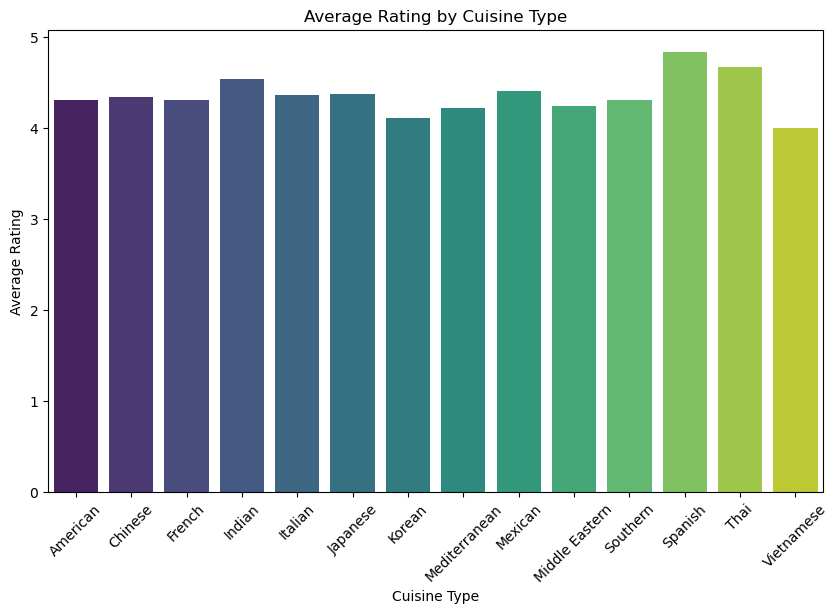

In [94]:
avg_rating_by_cuisine_type = df.groupby('cuisine_type')['rating'].mean()
print(avg_rating_by_cuisine_type)
avg_rating_by_cuisine_type = avg_rating_by_cuisine_type.reset_index()

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating_by_cuisine_type, x='cuisine_type', y='rating', palette='viridis')
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# OPERATIONAL EFFICIENCY 

## 1.What is the average delivery time for all orders?

In [95]:
avg_delivery_time_for_all_orders = df['delivery_time'].mean()
print("Average delivery time for all orders is: ",avg_delivery_time_for_all_orders)

Average delivery time for all orders is:  24.154177433247202


## 2.Which restaurant has the longest average delivery time?

Restaurant with the highest average delivery time is: Ravagh Persian Grill


C:\Users\ACER\anaconda3\New folder\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


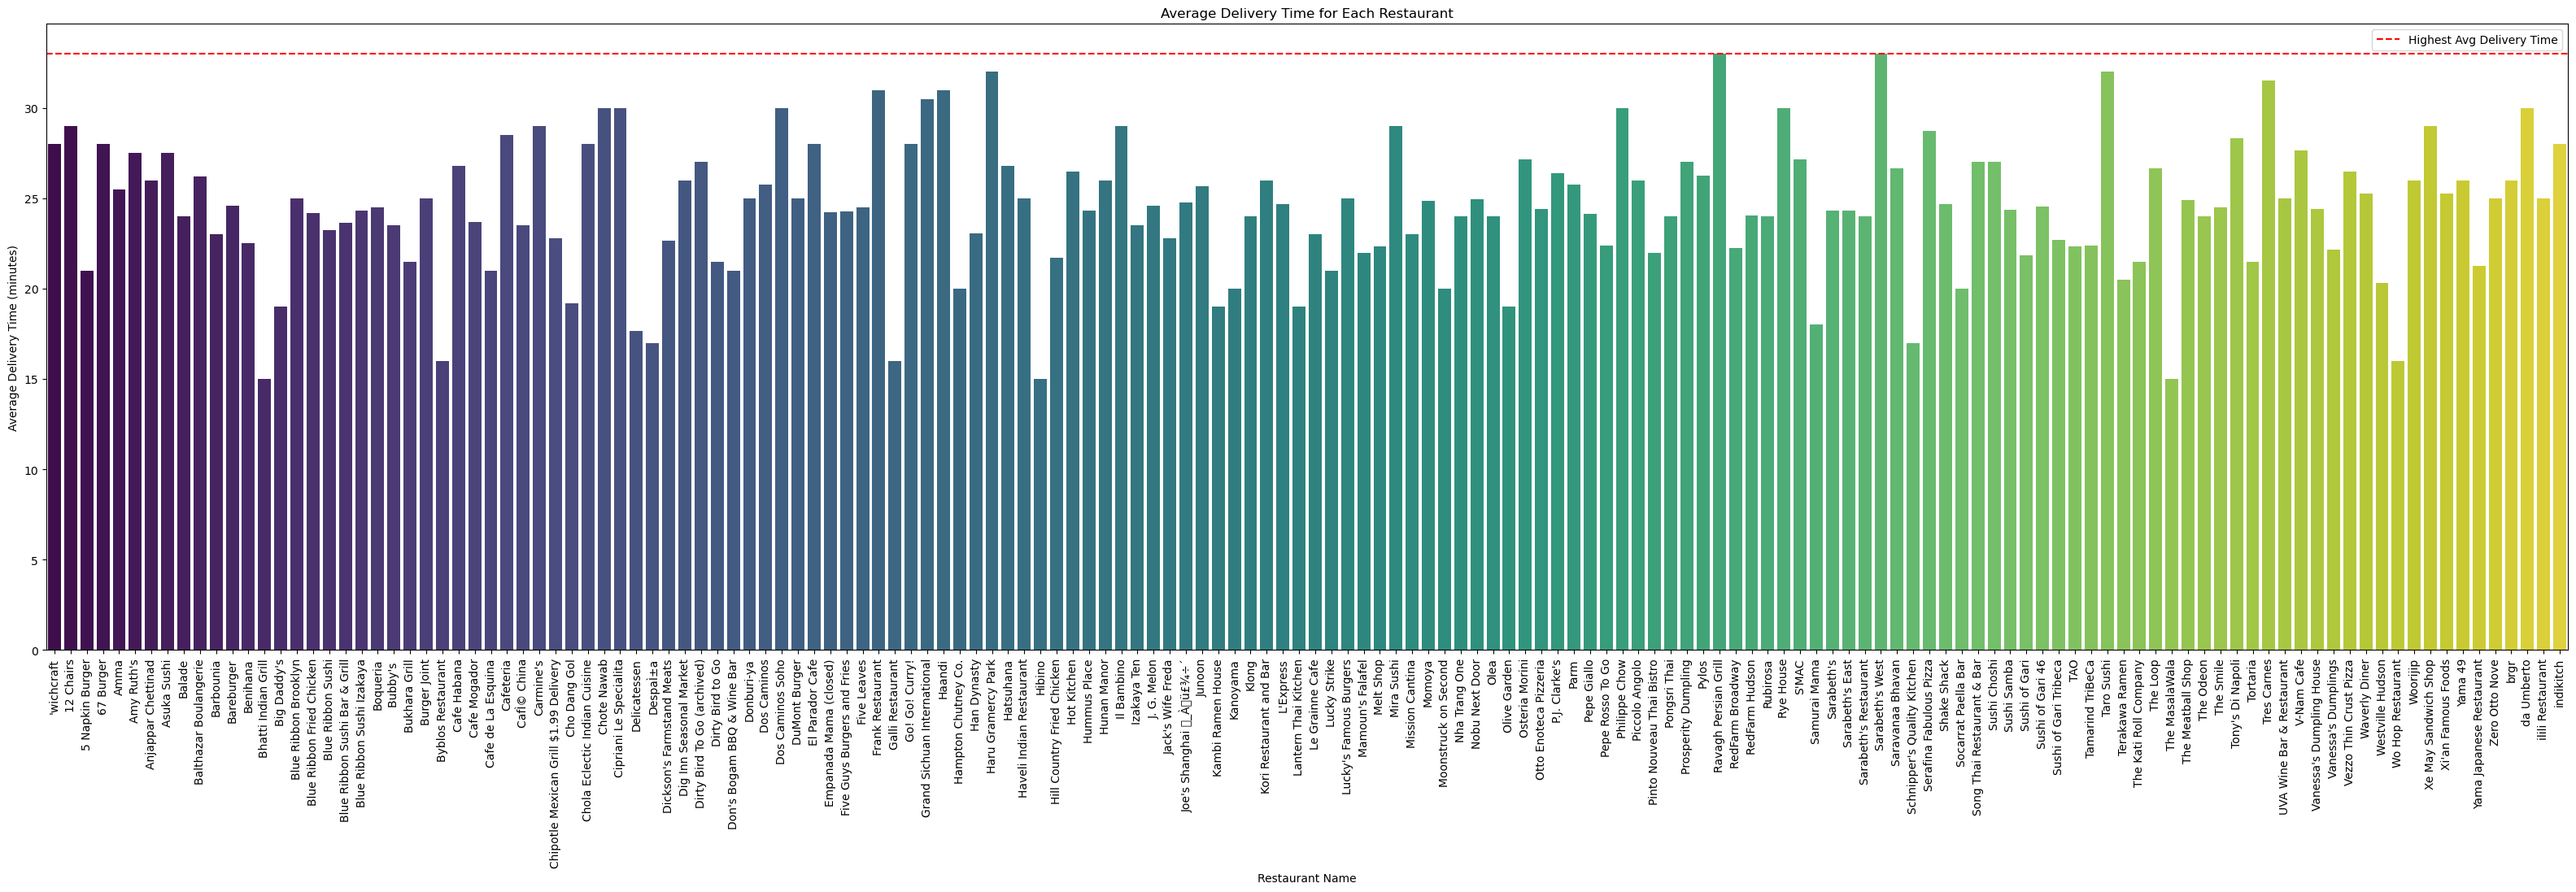

In [96]:
# Calculate average delivery time for each restaurant
avg_delivery_time = df.groupby('restaurant_name')['delivery_time'].mean().reset_index(name='avg_delivery_time')

# Find the restaurant with the highest average delivery time
highest_avg_delivery_time = avg_delivery_time.loc[avg_delivery_time['avg_delivery_time'].idxmax()]

print("Restaurant with the highest average delivery time is:", highest_avg_delivery_time['restaurant_name'])


# Plotting using seaborn
plt.figure(figsize=(40, 10))
sns.barplot(data=avg_delivery_time, x='restaurant_name', y='avg_delivery_time', palette='viridis')
plt.title('Average Delivery Time for Each Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=90)

# Highlight the restaurant with the highest average delivery time
plt.axhline(y=highest_avg_delivery_time['avg_delivery_time'], color='r', linestyle='--', label='Highest Avg Delivery Time')
plt.legend()

plt.show()

## 3.Is there a relationship between food preparation time and delivery time?

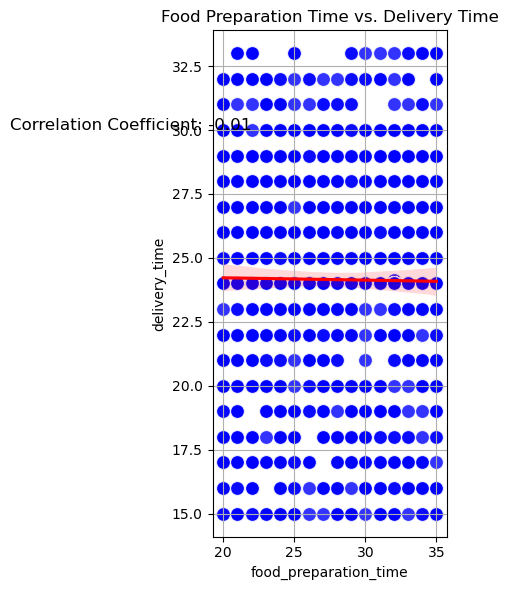

In [99]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time', color='b', s=100, alpha=0.8)
plt.title('Food Preparation Time vs. Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')

# Adding a trendline (optional)
sns.regplot(data=df, x='food_preparation_time', y='delivery_time', scatter=False, color='r')

# Calculate correlation coefficient
correlation_coefficient = df['food_preparation_time'].corr(df['delivery_time'])
plt.text(5, 30, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

## 4.How does the delivery time impact customer ratings?

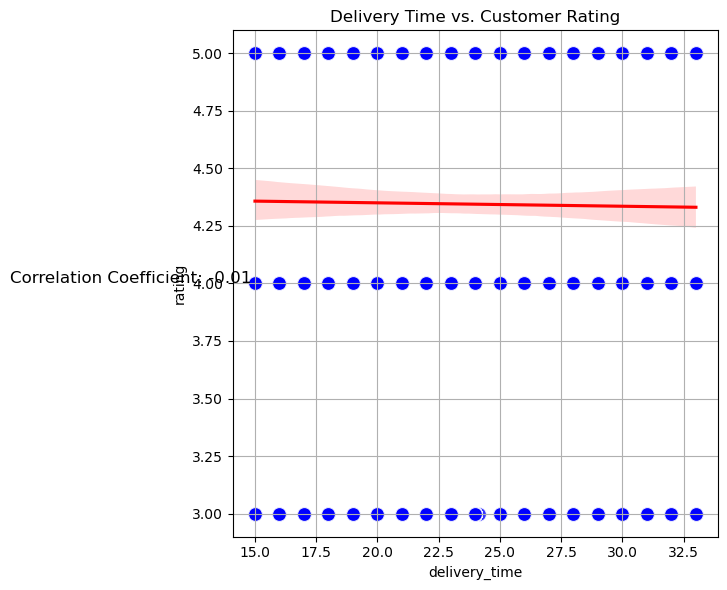

In [100]:
# Plotting with seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='delivery_time', y='rating', color='b', s=100, alpha=0.8)
plt.title('Delivery Time vs. Customer Rating')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Customer Rating')

# Adding a trendline (optional)
sns.regplot(data=df, x='delivery_time', y='rating', scatter=False, color='r')

# Calculate correlation coefficient
correlation_coefficient = df['delivery_time'].corr(df['rating'])
plt.text(5, 4, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

# CUSTOMER INSIGHTS 

## 1.What is the repeat order rate (number of customers who have placed more than one order)? 

In [101]:
# Calculate number of orders per customer
orders_per_customer = df.groupby('customer_id')['order_id'].nunique()

# Calculate repeat order rate
customers_with_multiple_orders = (orders_per_customer > 1).sum()
total_customers = orders_per_customer.count()
repeat_order_rate = (customers_with_multiple_orders / total_customers) * 100

print(f"Repeat Order Rate: {repeat_order_rate:.2f}%")

Repeat Order Rate: 23.86%


## 2.What percentage of orders receive a rating of 4 or higher?

In [102]:
# Calculate average rating per order
rating_per_order = df.groupby('order_id')['rating'].mean()

# Calculate number of orders with rating > 4
order_with_rating_four_greater = (rating_per_order > 4).sum()

# Calculate total number of orders
total_orders = rating_per_order.count()

# Calculate percentage of orders with rating > 4
order_rating_percentage = (order_with_rating_four_greater / total_orders) * 100

print(f"Percentage of orders with rating greater than 4: {order_rating_percentage:.2f}%")

Percentage of orders with rating greater than 4: 50.60%
